In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
HouseDF = pd.read_csv('D12.csv')
HouseDF.head()

,date_added,baths,area_marla,area_sqft,bedrooms,price
0,8/8/2018,0,20.0,5445.02,3,70000000
1,8/8/2018,3,20.0,5445.02,4,75000000
2,8/8/2018,4,20.0,5445.02,4,75000000
3,8/8/2018,5,20.0,5445.02,4,90000
4,8/8/2018,3,4.4,1197.90,3,45000


In [4]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_added  622 non-null    object 
 1   baths       622 non-null    int64  
 2   area_marla  622 non-null    float64
 3   area_sqft   622 non-null    float64
 4   bedrooms    622 non-null    int64  
 5   price       622 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 29.3+ KB


In [5]:
HouseDF.describe()

,baths,area_marla,area_sqft,bedrooms,price
count,622.000000,622.000000,622.000000,622.000000,6.220000e+02
mean,1.856913,15.014952,4087.833312,1.850482,1.409143e+07
std,2.446288,122.524843,33357.511157,2.330604,2.099094e+07
min,0.000000,2.000000,544.500000,0.000000,4.000000e+00
25%,0.000000,4.400000,1197.900000,0.000000,5.500000e+04
50%,0.000000,10.000000,2722.510000,0.000000,1.150000e+05
75%,3.000000,14.000000,3811.510000,3.000000,1.900000e+07
max,13.000000,3060.000000,833088.060000,11.000000,1.050000e+08


In [6]:
HouseDF.columns

Index(['date_added', 'baths', 'area_marla', 'area_sqft', 'bedrooms', 'price'], dtype='object')

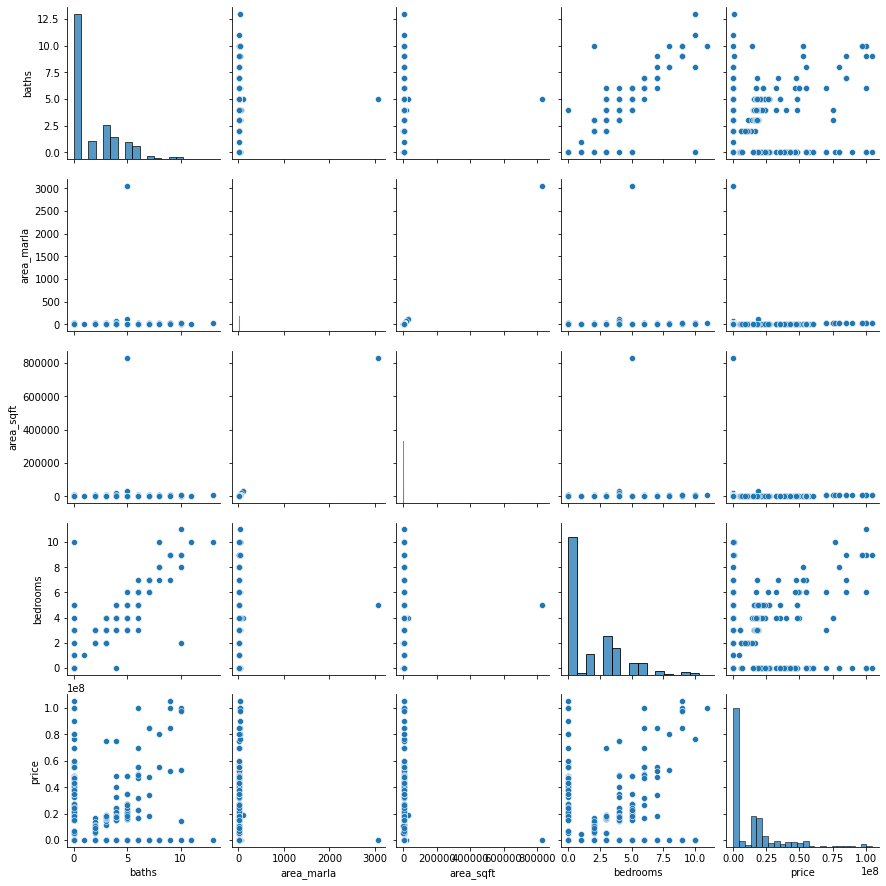

In [7]:
sns.pairplot(HouseDF)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


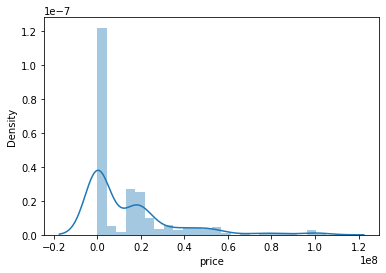

In [9]:
sns.distplot(HouseDF['price'])

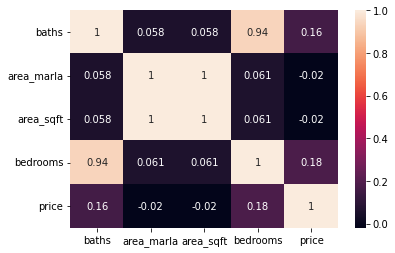

In [10]:
sns.heatmap(HouseDF.corr(), annot=True)

In [12]:
X = HouseDF[['baths', 'area_marla', 'area_sqft', 'bedrooms']]
y = HouseDF['price']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

In [14]:
from sklearn.linear_model import LinearRegression 

lm = LinearRegression() 

lm.fit(X_train,y_train) 

LinearRegression()

In [15]:
print(lm.intercept_)

6786266.258395875


In [17]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [18]:
coeff_df

,Coefficient
baths,-2.951006e+04
area_marla,2.605489e+11
area_sqft,-9.570165e+08
bedrooms,1.533146e+06


In [19]:
predictions = lm.predict(X_test)

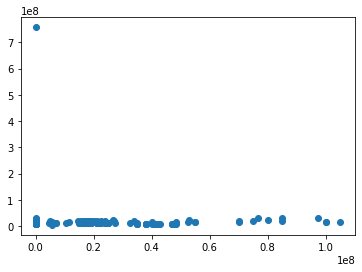

In [20]:
plt.scatter(y_test,predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


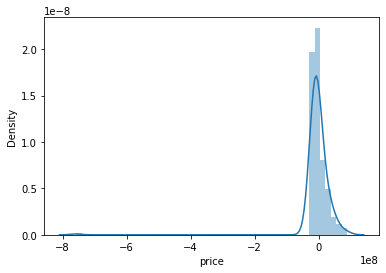

In [21]:
sns.distplot((y_test-predictions),bins=50); 

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 18536167.435483135
MSE: 2739415548825608.0
RMSE: 52339426.33259948
